In [ ]:
import torch
import utility
import data
from model import redcnn
import os
import yaml
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch.nn as nn

: 

In [2]:
with open(os.path.join('configs/test.yaml'), 'r') as f:
    config = yaml.load(f, Loader=yaml.FullLoader)

In [3]:
testset = np.load(os.path.join(config['dataset']['data_dir'], 'testset.npy'), allow_pickle=True).item()

In [9]:
load = 'experiment/redcnn_l1'
save = load

model = redcnn.REDCNN().to('cuda')
load_from = torch.load(os.path.join(load, 'model', 'model_best.pt'))
model.load_state_dict(load_from)

<All keys matched successfully>

In [10]:
u_water = 0.0192

result = np.zeros_like(testset['f_nd'])
f_qd = torch.from_numpy(testset['f_qd']).to('cuda').unsqueeze(0).unsqueeze(0)
f_qd = (f_qd - u_water) * 1000 / u_water

for i in tqdm(range(testset['f_qd'].shape[2])):
    f_qd_i = f_qd[:, :, :, :, i]
    f_qd_i = utility.normalize(f_qd_i, -500, 500)
    f_nd_i_hat = model(f_qd_i)
    f_nd_i_hat = utility.denormalize(f_nd_i_hat, -500, 500)
    result[:, :, i] = f_nd_i_hat.squeeze().cpu().detach().numpy()

100%|██████████| 600/600 [00:59<00:00, 10.04it/s]


In [12]:
np.save(os.path.join(save, 'results', 'result.npy'), result)

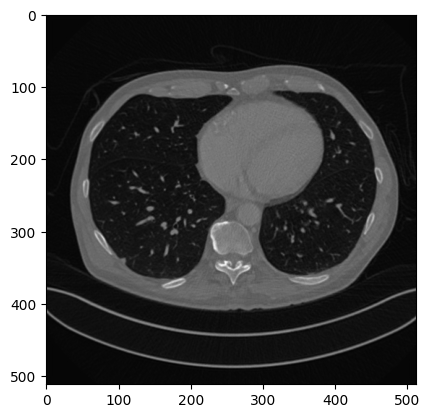

In [7]:
%matplotlib inline
plt.imshow(result[:, :, 0], cmap='gray')